<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1: Simulate the SI model in Equations 2-3 with forward Euler using parameters β = .005, N = 1000, S0 = 999, I0 = 1 and ∆t = 1 for 3000 iterations. Make a time series plot of S and I vs time and label the S and I curves.


Text(0.5, 1.0, 'SI Model')

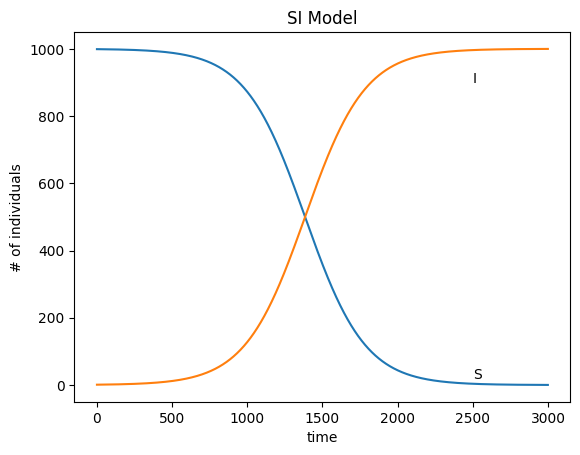

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

N = 1000
S = np.zeros(3000)
I = np.zeros(3000)
beta = .005
S[0] = 999
I[0] = 1
dt = 1

for n in range(2999):
  S[n+1]=(S[n]-dt*beta*S[n]*I[n]/N)
  I[n+1]=(I[n]+dt*beta*S[n]*I[n]/N)

plt.plot(S)
plt.plot(I)
plt.xlabel("time")
plt.ylabel("# of individuals")
plt.text(2500,900,"I")
plt.text(2500,20,"S")
plt.title("SI Model")


In this model, the population of both infected and susceptible individuals is being shown on a population of 1,000 total people. As we can see above, the numbers of infected individuals starts at 0 at time 0, where in contrast the amount of susceptible people begins at 1000, as all individuals in a population are susceptible to a disease at the onset. Over time, these two lines on the graph begin to take each others position. The longer that time goes on, the amount of infected people increases until a plateau. In contrast, the number of susceptible individuals in a population decreases over time as individuals begin to contract the disease, build natural immunity, are vaccinated, etc. The number of susceptible individuals plateaus at the end of time, signifying that all individuals in a population can/will be susceptible to a given disease, assuming everyone has taken one of the measures as mentioned above.

QUESTION 1b: As mentioned in RoC, the SI model satisfies the property that new infections (or adoptions in marketing) grow fastest when 21% of the population have been infected (regardless of the parameters). Verify this is true numerically for the simulation in 1a. In particular, define the variable Pn = βSnIn representing new infections. This will be growing fastest when the first derivative has a maximum, where the derivative can be approximated by dPn = (Pn+1 − Pn−1)/(2∆t). So in other words, make a plot of dPn and find the time when dPn is largest. At that time check that In/N ≈ .21.

<built-in function max>
[21.17278361]


Text(0.5, 1.0, 'SI Model')

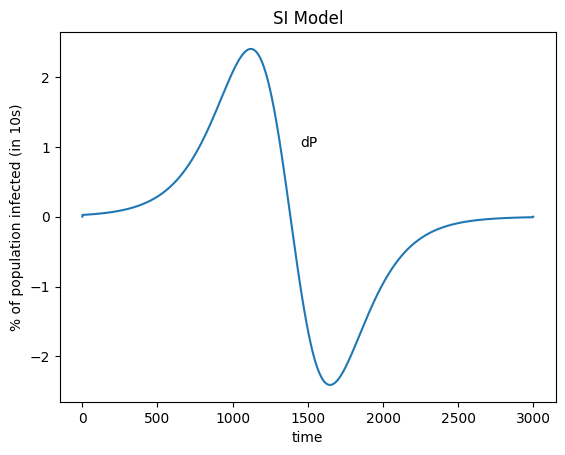

In [ ]:
#Emma Duffy
import numpy as np
import matplotlib.pyplot as plt

P = np.zeros(3000)
P[0] = 0
P[n] = beta*S[n]*I[n]
dP = np.zeros(3000)
dP[0] = 0

for n in range(3000):
  P[n] = beta * S[n] * I[n]

for n in range(1, 3000-1):
  dP[n] = (P[n+1] - P[n-1])/(2*dt)

plt.plot(dP)

maximum = np.max(dP)
x = np.where(dP == maximum)
print(max)
print(str((I[x]/N)*100))
plt.text(1450,1,"dP")
plt.xlabel("time")
plt.ylabel("% of population infected (in 10s)")
plt.title("SI Model")




In this model, the blue line of the graph represents the rate at which new infections occur (dP). As shown on the graph, there are maximums and minimums featured approximately around 21 and -21. For this example we are only concerned with the positive value of 21. The maximum at approximately 21 represents that this is when a disease grows the fastest within a population; when it has infected roughly 21% of the total population.

QUESTION 2: Simulate the SIR model with N=75000,I0 =.5,S0 =N−I0,R0 =0, γ = 5.6, β = 8 ∗ 10−5, ∆t = 1/7 (in weeks) and run the simulation for 50 weeks (parameters recommended from [1]). Next download the 1906 Bombay plague data from canvas (data can also be found in the R package “primer”). On the same graph, plot new deaths per week from the data alongside γI(t) to show the fit is reasonable. Note, however, that even though the model fits the data well, the parameters may not be realistic (for example the population was larger in 1906). We will see later how parameters can be estimated to fit a model to data.


In [ ]:
#Emma Duffy
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
df = pd.read_csv(io.BytesIO(uploaded['bombay_plague.csv']))
plt.plot(df.NewDeaths)

N = 75000
S = np.zeros(50)
I = np.zeros(50)
R = np.zeros(50)
F = np.zeros(50)
I[0] =.5
S[0] = N - I[0]
R[0] = 0
F[0] = 0
gamma = 5.6
beta = 8 * (10**-5) * N
dt = 1

for n in range(49):
  S[n+1]=S[n]-dt*beta*S[n]*I[n]/N
  I[n+1]=I[n]+dt*((beta*S[n]*I[n])/N - gamma*I[n])
  R[n+1] = R[n] + (dt * gamma * I[n])
  F[n+1] = gamma * I[n]

plt.plot(F)
plt.xlabel("weeks")
plt.ylabel("new deaths")
plt.text(0,600,"bombay plague")
plt.text(26,750,"γI(t)")
plt.title("SIR Model")



In question 2, the SIR model represents the results of new deaths per week (according to the 1906 Bombay plague in blue) as well as a line created to best fit the data using a population of 75,000 over 50 weeks. As can be seen in the graph, the Bombay plague features record numbers at approximately week 15 and again at week 20. The SIR model (yellow) fits the model well and shows a peak in new deaths at roughly the 22nd week. The parabola in yellow is an estimate of the data in accordance with the equations of susceptible, infectious, and recovered individuals.

QUESTION 3: Consider the SIR model and suppose now there are 2 types of infected in- dividuals, those that are symptomatic and those that are asymptomatic. Let’s assume that both are removed at the same rate, however the asymptomatic group have a different (potentially larger) contact rate with susceptible individ- uals. How could you modify the SIR equations to capture such a scenario?



In order to account for both symptomatic and asymptomatic individuals, one way that you could modify the SIR equations is to create two different equations of infection. The visual model to represent this phenomena is as follows:

[SEIR MODEL](https://docs.google.com/drawings/d/1Y-3LoQN9yOtEQdrwytvu5GF12GYauiJnFr4-JiB1mFI/edit?usp=sharing)

Susceptible --> Exposed --> Infected (Asymptomatic) or Infected (Symptomatic) (two seperate paths on map) --> Recovered

Because the infected population can be both asymptomatic and symptomatic, we must account for these two events in different ways. If you are asymptomatic, the beta variable, representing contact rate will vary from that of the beta variable for the symptomatic model. This is so because when an individual is asymptomatic, it can be nearly impossible for them to know they are infected. Therefore, they may have a higher contact rate because they are not taking the proper isolation steps to protect themselves as well as others from contracting any said disease. It is also important to note that if you are asymptomatic and you infect another individual they will not necessarily also be asymptomatic. Though you may not experience symptoms, someone else who you unknowingly contact could.

The rate of asymptomatic individulas will be :
$dIa/dt = Mu(a)*E - d(a)*I(a)$

where dIa = the rate at which infected individuals are asymptomatic, mu(sub a) = the number of exposed to infectious individuals (rate per unit time an exposed person becomes infectious (incubation period)), and E = the number of exposed individuals in a given population.

Simialrly, the rate of symptomatic individuals will be:
$dIs/dt = Mu(s)*E - d(s)*I(s)$

where dIs = the rate at which infected individuals are symptomatic, mu(sub s)= the number of exposed to infectious individuals (rate per unit time an exposed person becomes infectious (incubation period)), and E = the number of exposed individuals in a given population.

Because the equations of susceptible and exposed individuals rely on the function I(n), these equations will consequently have to be altered as well to account for both scenerios of infection. An additional change for the variable of beta will occur because an asymptomatic individuals has a higher contact rate than that of a symptomatic individual.

The rate of total susceptible individuals will be: $dS/dt = -beta(a) *S*(I(a)/N) - beta(s)*S*I((s)/N))$

The rate of total exposed individuals will be: $dE/dt = beta(a)*S*(I(a)/N))+beta(s)*S*I((s)/N) - Mu(a)*E - Mu(s)*E$

The rate of total recovered individuals will be:
$dR/dt = gamma(a)*I(a) + gamma(s)*I(s)$


As we can see, these cases must be handleded differently and are featured in each of the equations as different variables. However, each will contribute into the same recovery rate. To validate the math presented here, the sum of the derivities should be 0 unless explicitly looking for a birthate of death rate of a population.